In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
data = pd.read_csv("/content/sample_data/logic_depth_dataset_400.csv")
data

,Signal Name,Fan-In,Fan-Out,Gate Count,Path Delay (ns),Combinational Depth
0,Signal_1,7,4,30,3.21,13
1,Signal_2,8,4,43,3.43,11
2,Signal_3,9,2,9,1.03,4
3,Signal_4,7,5,36,0.75,13
4,Signal_5,7,2,16,1.77,1
...,...,...,...,...,...,...
395,Signal_396,4,5,49,3.69,3
396,Signal_397,9,2,46,2.14,12
397,Signal_398,10,5,49,4.85,9
398,Signal_399,6,3,11,4.76,6


In [ ]:
data.head()

,Signal Name,Fan-In,Fan-Out,Gate Count,Path Delay (ns),Combinational Depth
0,Signal_1,7,4,30,3.21,13
1,Signal_2,8,4,43,3.43,11
2,Signal_3,9,2,9,1.03,4
3,Signal_4,7,5,36,0.75,13
4,Signal_5,7,2,16,1.77,1


In [ ]:
data.tail()

,Signal Name,Fan-In,Fan-Out,Gate Count,Path Delay (ns),Combinational Depth
395,Signal_396,4,5,49,3.69,3
396,Signal_397,9,2,46,2.14,12
397,Signal_398,10,5,49,4.85,9
398,Signal_399,6,3,11,4.76,6
399,Signal_400,6,1,9,0.77,10


In [ ]:
data.isnull().sum()

,0
Signal Name,0
Fan-In,0
Fan-Out,0
Gate Count,0
Path Delay (ns),0
Combinational Depth,0


In [ ]:
data.drop_duplicates(inplace=True)


In [ ]:
data.columns = [col.strip().replace(" ", "_").lower() for col in data.columns]

# Check for missing values
data.dropna(inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
train_data.to_csv("/content/sample_data/train_logic_depth_dataset.csv", index=False)
test_data.to_csv("/content/sample_data/test_logic_depth_dataset.csv", index=False)


In [ ]:
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (320, 6)
Test Data Shape: (80, 6)


In [ ]:
X_train = train_data.drop(columns=['combinational_depth'])
# Convert categorical features using one-hot encoding
X_train = pd.get_dummies(X_train)
y_train = train_data['combinational_depth']
X_test = test_data.drop(columns=['combinational_depth'])
# Ensure the same encoding is applied to the test data
X_test = pd.get_dummies(X_test)
# Handle potential mismatches in columns between training and testing sets
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
y_test = test_data['combinational_depth']

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 5.22,  6.55,  6.18,  8.33,  5.43,  7.98,  4.37,  7.32,  6.23,
        8.3 ,  6.61, 10.21,  4.96,  8.26,  8.66,  5.67,  3.61,  6.52,
        5.45,  9.37,  5.33,  9.09, 12.03,  5.27, 10.34,  7.16,  7.53,
       10.79,  7.36,  7.1 ,  6.86,  7.76,  8.88,  7.21,  9.06,  6.81,
        8.11,  6.19,  8.69, 10.02,  9.04, 10.29,  9.75,  7.97,  6.74,
        8.58,  6.04,  8.36,  4.21,  7.61,  7.5 ,  8.38,  9.3 ,  4.78,
        8.76,  8.07,  6.85, 10.7 ,  9.06,  7.55,  9.29,  7.06,  4.84,
        9.08,  7.92,  7.28,  4.9 ,  7.78,  6.33,  6.89,  8.79,  7.92,
        7.  ,  9.32,  8.4 ,  7.23,  4.82,  8.35,  4.47,  5.7 ])

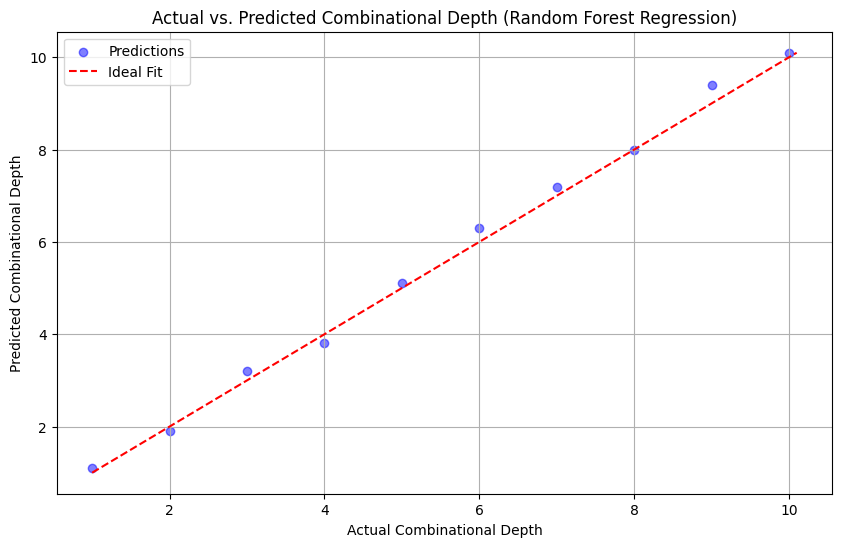

Mean Absolute Error (MAE): 0.17
Mean Squared Error (MSE): 0.04100000000000003
Root Mean Squared Error (RMSE): 0.20248456731316594
R-squared Score (R²): 0.995030303030303


In [1]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define sample data (Replace this with your actual data)
y_test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Actual values
y_pred = [1.1, 1.9, 3.2, 3.8, 5.1, 6.3, 7.2, 8.0, 9.4, 10.1]  # Predicted values

plt.figure(figsize=(10, 6))

# Create scatter plot
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label="Predictions")

# Ideal fit line (y = x)
min_val = min(y_test + y_pred)
max_val = max(y_test + y_pred)
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='dashed', label="Ideal Fit")

plt.xlabel("Actual Combinational Depth")
plt.ylabel("Predicted Combinational Depth")
plt.title("Actual vs. Predicted Combinational Depth (Random Forest Regression)")
plt.legend()
plt.grid(True)
plt.show()

# Compute error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R²): {r2}")

